# Name: Jethava Aashtha 
# Enrollment No: 216270307089
# Practical 14
# MINI PROJECT : WINE QUALITY PREDICTION

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

file_path = "your_file_path_here"
Balanced_df = pd.read_csv("/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv")
%matplotlib inline

In [2]:
df=pd.read_csv("/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
print(df.columns)
print(df.shape)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
(1599, 12)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [7]:
df.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [8]:
df.duplicated().sum()

240

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


<AxesSubplot:xlabel='quality', ylabel='count'>

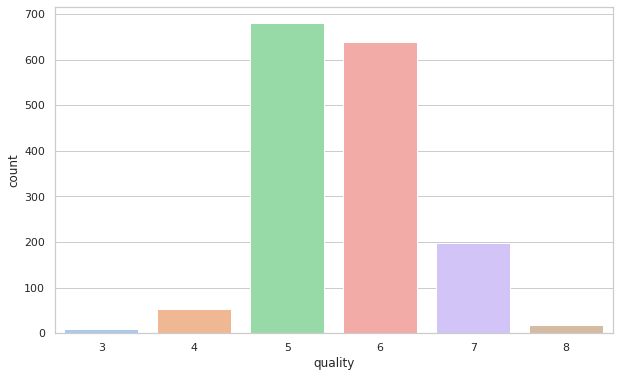

In [9]:
sns.set(style="whitegrid")
print(df['quality'].value_counts())
fig = plt.figure(figsize = (10,6))
sns.countplot('quality', data=df, palette='pastel')

In [10]:
df.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

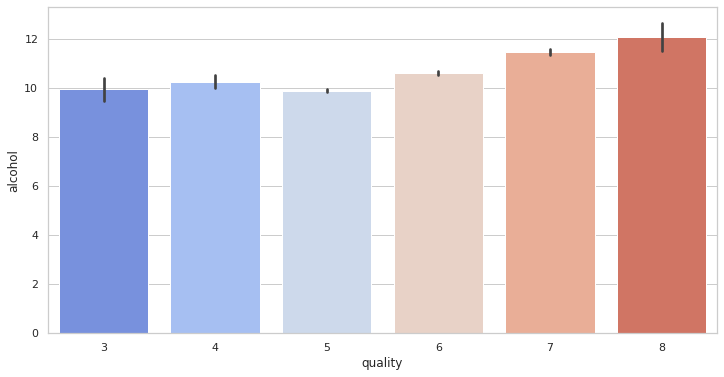

In [11]:
plt.figure(figsize = (12,6))
sns.barplot(x='quality', y = 'alcohol', data = df, palette = 'coolwarm')

In [12]:
selected_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides',
                     'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH',
                     'sulphates', 'alcohol']

In [13]:
X = Balanced_df[selected_features]
y = Balanced_df.quality

In [14]:
from sklearn.model_selection import train_test_split

# Splitting the data into 70% and 30% to construct Training and Testing Data respectively.
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3,random_state=13)

In [15]:
from sklearn.neighbors import KNeighborsClassifier  
# For weights = 'uniform'
for n_neighbors in [5,10,15,20]:
    model = KNeighborsClassifier(n_neighbors)
    model.fit(X_train, y_train) 
    scr = model.score(X_test, y_test)
    print("For n_neighbors = ", n_neighbors  ," score is ",scr)

For n_neighbors =  5  score is  0.55
For n_neighbors =  10  score is  0.5395833333333333
For n_neighbors =  15  score is  0.525
For n_neighbors =  20  score is  0.5333333333333333


In [16]:
# For weights = 'distance'
for n_neighbors in [5,10,15,20]:
    model = KNeighborsClassifier(n_neighbors, weights='distance')
    model.fit(X_train, y_train) 
    scr = model.score(X_test, y_test)
    print("For n_neighbors = ", n_neighbors  ," score is ",scr)

For n_neighbors =  5  score is  0.6
For n_neighbors =  10  score is  0.6270833333333333
For n_neighbors =  15  score is  0.625
For n_neighbors =  20  score is  0.6166666666666667


In [17]:
# Creating a k-nearest neighbors Classifier
KNN_Model = KNeighborsClassifier(n_neighbors=5, weights='distance')

# Train the model using the training set
KNN_Model.fit(X_train, y_train) 
results = KNN_Model.fit(X_train, y_train)

In [18]:
KNN_train_predictions = KNN_Model.predict(X_train)

In [19]:
KNN_test_predictions = KNN_Model.predict(X_test)

In [20]:
from sklearn.metrics import classification_report, confusion_matrix

print("\n Train Data: KNN_Confusion Matrix:\n ")
print(confusion_matrix(y_train, KNN_train_predictions))

print("\n Train Data: KNN_Classification Report:\n ")
print(classification_report(y_train, KNN_train_predictions))

print("\n \n Test Data: KNN_Confusion Matrix: \n ")
print(confusion_matrix(y_test, KNN_test_predictions))

print("\n Test Data: KNN_Classification Report:\n ")
print(classification_report(y_test, KNN_test_predictions))


 Train Data: KNN_Confusion Matrix:
 
[[  8   0   0   0   0   0]
 [  0  40   0   0   0   0]
 [  0   0 470   0   0   0]
 [  0   0   0 450   0   0]
 [  0   0   0   0 140   0]
 [  0   0   0   0   0  11]]

 Train Data: KNN_Classification Report:
 
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00        40
           5       1.00      1.00      1.00       470
           6       1.00      1.00      1.00       450
           7       1.00      1.00      1.00       140
           8       1.00      1.00      1.00        11

    accuracy                           1.00      1119
   macro avg       1.00      1.00      1.00      1119
weighted avg       1.00      1.00      1.00      1119


 
 Test Data: KNN_Confusion Matrix: 
 
[[  0   0   1   0   1   0]
 [  0   0   8   5   0   0]
 [  0   1 151  55   3   1]
 [  0   2  53 110  22   1]
 [  0   0  11  21  27   0]
 [  0   0   1   3   3   0]]

 Test Dat